In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cuisines = pd.read_csv(r"C:\Users\Phavour\Downloads\Personal Python-ML project\Simplilearn\Workspace\Untitled Folder 1\cuisines.csv")
cuisines.head()

Unnamed: 0 cuisine  almond  angelica  anise  anise_seed  apple  \
0          65  indian       0         0      0           0      0   
1          66  indian       1         0      0           0      0   
2          67  indian       0         0      0           0      0   
3          68  indian       0         0      0           0      0   
4          69  indian       0         0      0           0      0   

   apple_brandy  apricot  armagnac  ...  whiskey  white_bread  white_wine  \
0             0        0         0  ...        0            0           0   
1             0        0         0  ...        0            0           0   
2             0        0         0  ...        0            0           0   
3             0        0         0  ...        0            0           0   
4             0        0         0  ...        0            0           0   

   whole_grain_wheat_flour  wine  wood  yam  yeast  yogurt  zucchini  
0                        0     0     0    0      0       0         0  
1                        0     0     0    0      0       0         0  
2                        0     0     0    0      0       0         0  
3                        0     0     0    0      0       0         0  
4                        0     0     0    0      0       1         0  

[5 rows x 385 columns]

In [3]:
cuisines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


<Axes: ylabel='cuisine'>

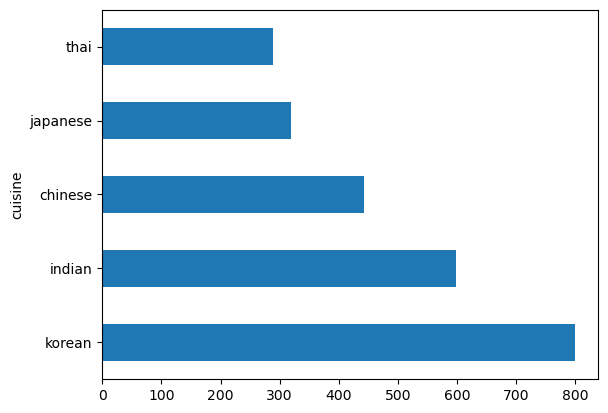

In [4]:
cuisines.cuisine.value_counts().plot.barh()

In [5]:
# creating a dataframe for each cuisine
thai_df = cuisines[(cuisines.cuisine == 'thai')]
japanese_df = cuisines[(cuisines.cuisine == 'japanese')]
chinese_df = cuisines[(cuisines.cuisine == 'chinese')]
indian_df = cuisines[(cuisines.cuisine == 'indian')]
korean_df = cuisines[(cuisines.cuisine == 'korean')]


In [6]:
# getting the shape of each cuisine
print(f"thai :{thai_df.shape}")
print(f"japanese :{japanese_df.shape}")
print(f"chinese :{chinese_df.shape}")
print(f"indian :{indian_df.shape}")
print(f"korean :{korean_df.shape}")

thai :(289, 385)
japanese :(320, 385)
chinese :(442, 385)
indian :(598, 385)
korean :(799, 385)


In [7]:
def create_ingredient(cuisines):
    ingredient_df = cuisines.T.drop(['Unnamed: 0','cuisine']).sum(axis = 1).to_frame('value')
    ingredient_df = ingredient_df[(ingredient_df.T !=0).any()]
    ingredient_df = ingredient_df.sort_values(by='value',ascending=False,inplace = False)
    return ingredient_df

<Axes: >

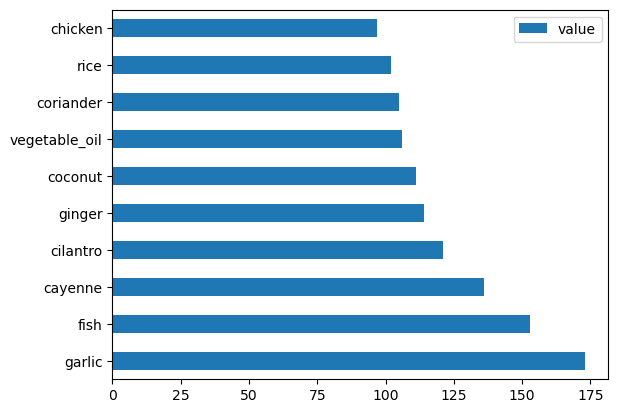

In [8]:
thai_ingredient = create_ingredient(thai_df)
thai_ingredient.head(10).plot.barh()

<Axes: >

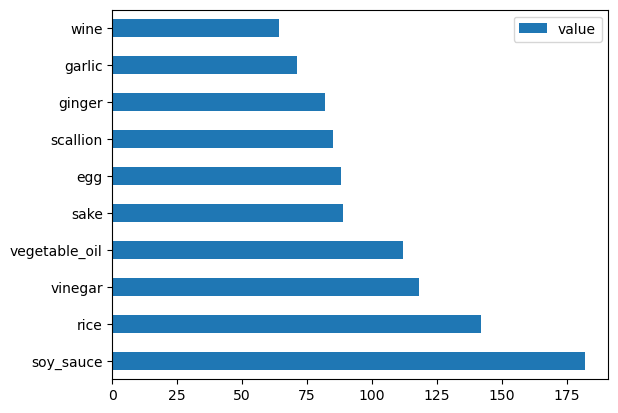

In [9]:
japanese_ingredient = create_ingredient(japanese_df)
japanese_ingredient.head(10).plot.barh()

<Axes: >

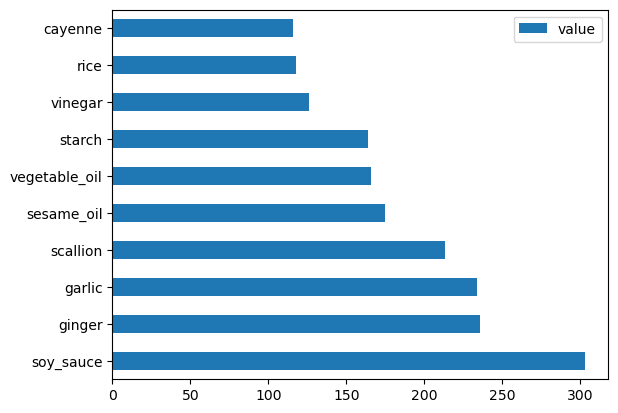

In [10]:
chinese_ingredient = create_ingredient(chinese_df)
chinese_ingredient.head(10).plot.barh()

<Axes: >

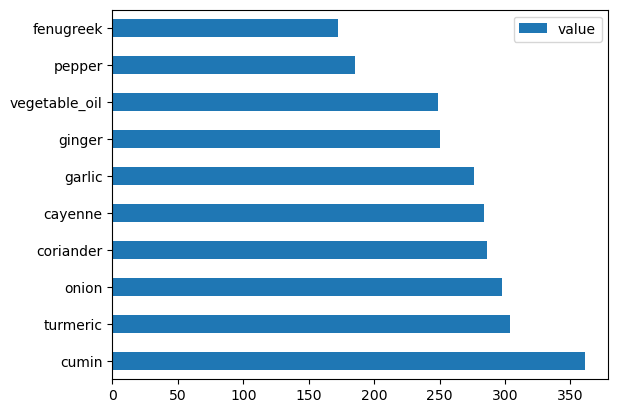

In [11]:
indian_ingredient = create_ingredient(indian_df)
indian_ingredient.head(10).plot.barh()

<Axes: >

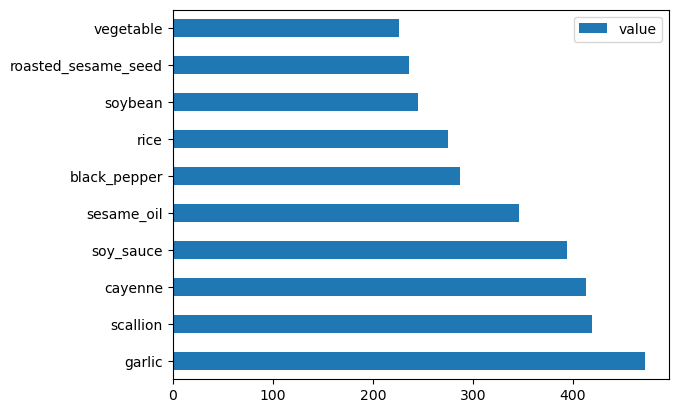

In [12]:
korean_ingredient = create_ingredient(korean_df)
korean_ingredient.head(10).plot.barh()

In [13]:
features_df = cuisines.drop(['Unnamed: 0','garlic','rice','cuisine'],axis=1)
label_df = cuisines.cuisine
label_df

0         indian
1         indian
2         indian
3         indian
4         indian
          ...   
2443    japanese
2444    japanese
2445    japanese
2446    japanese
2447    japanese
Name: cuisine, Length: 2448, dtype: object

In [14]:
from imblearn.over_sampling import SMOTE
sampling = SMOTE()

In [15]:
transformed_f, transformed_l = sampling.fit_resample(features_df,label_df)

In [16]:
print(f"Old Label count :\n{label_df.value_counts()}")
print("+++"*10)
print(f"New Label count :\n{transformed_l.value_counts()}")

Old Label count :
cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64
++++++++++++++++++++++++++++++
New Label count :
cuisine
indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: count, dtype: int64


In [17]:
# creating logistics model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(transformed_f,transformed_l,test_size=0.3)


In [19]:
Lr = LogisticRegression(multi_class='ovr',solver='liblinear')

lrmodel = Lr.fit(xtrain,np.ravel(ytrain))

accuracy = lrmodel.score(xtest,ytest)
accuracy

0.7723102585487907

In [20]:
print(f"Ingredient: {xtest.iloc[50][xtest.iloc[50]!=0].keys()}")
print(f"cuisine: {ytest.iloc[50]}")

Ingredient: Index(['bell_pepper', 'chicken_broth', 'ginger', 'peanut_oil', 'scallion',
       'sherry', 'shrimp', 'soy_sauce', 'starch', 'thai_pepper'],
      dtype='object')
cuisine: chinese


In [21]:
test = xtest.iloc[50].values.reshape(-1, 1).T
prob = lrmodel.predict_proba(xtest)
classes = lrmodel.classes_
result_df = pd.DataFrame(data = prob,columns=classes)

topped = result_df.T.sort_values(by=[0],ascending=[False])
topped.head()

0         1         2         3         4         5     \
thai      0.696810  0.000555  0.213510  0.229505  0.236042  0.164586   
korean    0.169898  0.922327  0.145010  0.026526  0.023239  0.044523   
chinese   0.114891  0.075757  0.078773  0.061930  0.468721  0.618747   
japanese  0.011468  0.000548  0.562587  0.005723  0.159018  0.168897   
indian    0.006933  0.000813  0.000121  0.676317  0.112980  0.003248   

              6         7         8         9     ...      1189      1190  \
thai      0.014925  0.025823  0.093366  0.001273  ...  0.236530  0.036617   
korean    0.104053  0.671004  0.132332  0.154081  ...  0.000178  0.005787   
chinese   0.019861  0.169972  0.111347  0.784740  ...  0.004414  0.956575   
japanese  0.860234  0.131956  0.487294  0.059792  ...  0.008805  0.000805   
indian    0.000927  0.001244  0.175661  0.000114  ...  0.750074  0.000217   

              1191      1192      1193      1194      1195      1196  \
thai      0.877897  0.015214  0.251516  0.005977  0.004337  0.269838   
korean    0.000202  0.142871  0.011821  0.001498  0.000003  0.098303   
chinese   0.001057  0.074068  0.733643  0.003443  0.005749  0.190972   
japanese  0.006330  0.763388  0.001933  0.000459  0.000002  0.285490   
indian    0.114514  0.004459  0.001086  0.988624  0.989909  0.155396   

              1197      1198  
thai      0.220394  0.457301  
korean    0.675007  0.285833  
chinese   0.102373  0.060368  
japanese  0.002185  0.194780  
indian    0.000040  0.001718  

[5 rows x 1199 columns]

In [22]:
y_predict = lrmodel.predict(xtest)
print(classification_report(ytest,y_predict))

              precision    recall  f1-score   support

     chinese       0.72      0.65      0.68       237
      indian       0.91      0.88      0.89       245
    japanese       0.62      0.77      0.69       234
      korean       0.83      0.81      0.82       248
        thai       0.81      0.75      0.78       235

    accuracy                           0.77      1199
   macro avg       0.78      0.77      0.77      1199
weighted avg       0.78      0.77      0.77      1199

